<a href="https://www.kaggle.com/code/shivankv098/gold-stock-prize?scriptVersionId=160068685" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gold-stock-prices/goldstock.csv


In [2]:
df = pd.read_csv('/kaggle/input/gold-stock-prices/goldstock.csv')
df

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1
...,...,...,...,...,...,...,...
2506,2528,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
2507,2529,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2508,2530,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2509,2531,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8


## The dataset consists of the following columns:

1. **Date**: A unique date for each trading day recorded.  
2. **Close**: The closing price of gold on the relevant date.  
3. **Volume**: Gold trading volume on the relevant date.  
4. **Open**: The opening price of gold on the relevant date.  
5. **High**: The highest recorded price of gold during the trading day.  
6. **Low**: The lowest price recorded for gold in the trading day.  

**Droping the index column "Unnamed: 0"**

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,Date,Close,Volume,Open,High,Low
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1
...,...,...,...,...,...,...
2506,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
2507,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2508,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2509,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2511 non-null   object 
 1   Close   2511 non-null   float64
 2   Volume  2511 non-null   float64
 3   Open    2511 non-null   float64
 4   High    2511 non-null   float64
 5   Low     2511 non-null   float64
dtypes: float64(5), object(1)
memory usage: 117.8+ KB


**Date column has an object format so converting it to datetime format in next cell**

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2511 non-null   datetime64[ns]
 1   Close   2511 non-null   float64       
 2   Volume  2511 non-null   float64       
 3   Open    2511 non-null   float64       
 4   High    2511 non-null   float64       
 5   Low     2511 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 117.8 KB


In [6]:
df.describe(include='all')

,Date,Close,Volume,Open,High,Low
count,2511,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,2019-01-17 07:28:27.526881792,1498.726085,185970.770609,1498.725528,1508.451454,1488.869932
min,2014-01-22 00:00:00,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,2016-07-19 12:00:00,1249.850000,126693.500000,1249.500000,1257.300000,1242.350000
50%,2019-01-17 00:00:00,1332.800000,175421.000000,1334.000000,1342.400000,1326.600000
75%,2021-07-17 12:00:00,1805.850000,234832.000000,1805.600000,1815.450000,1793.050000
max,2024-01-19 00:00:00,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000
std,NaN,298.824811,97600.769382,299.118187,301.262244,296.417703


In [7]:
df.isna().sum()

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

**Dataset does not contain any null value which is good news**

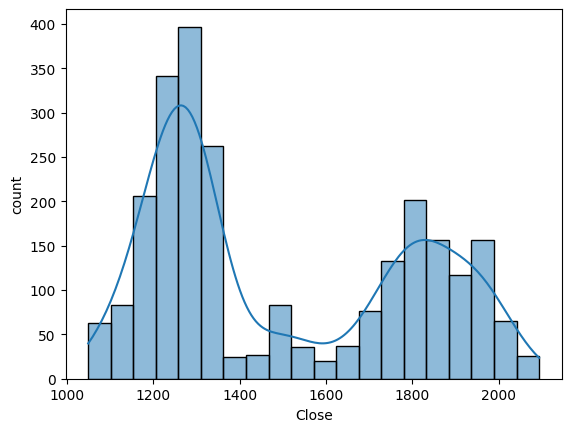

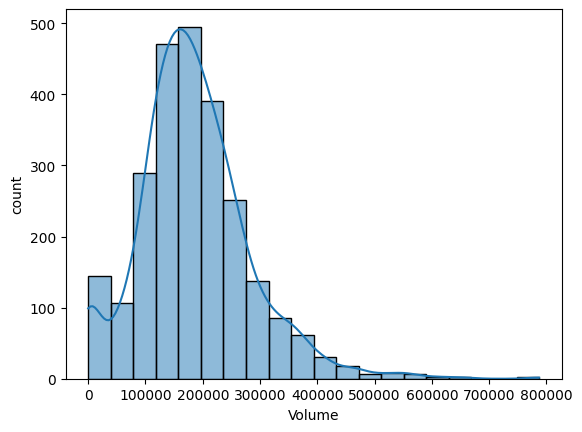

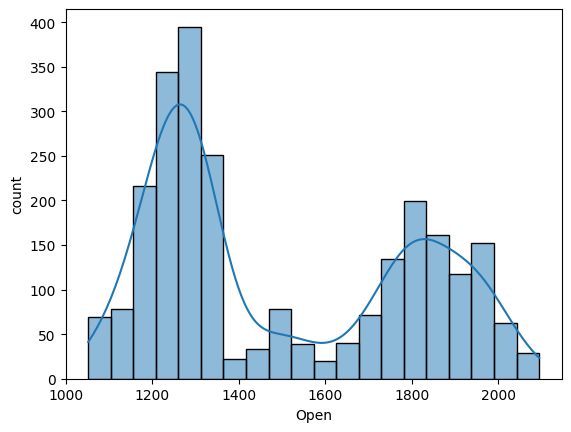

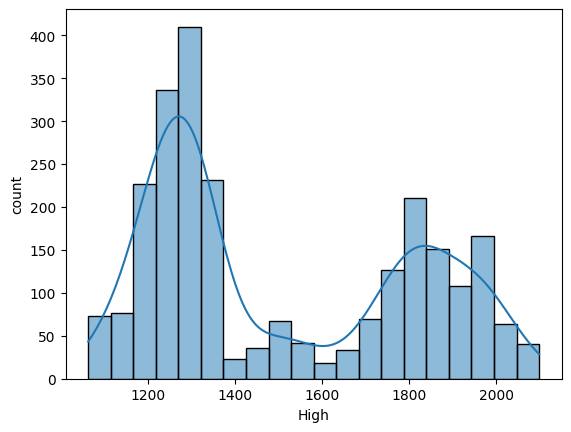

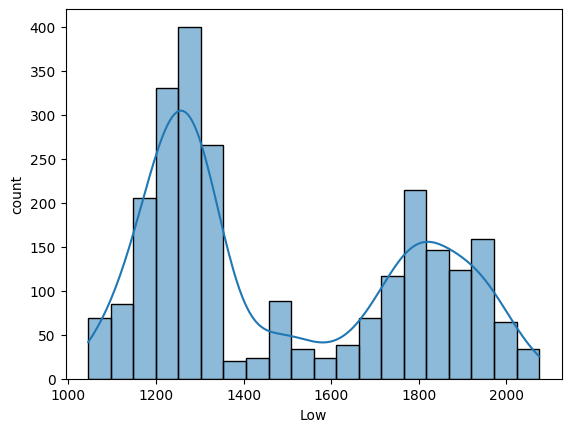

In [8]:
for col in df.columns:
    if df[col].dtype != 'datetime64[ns]':
        sns.histplot(df[col],bins=20,kde=True)
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

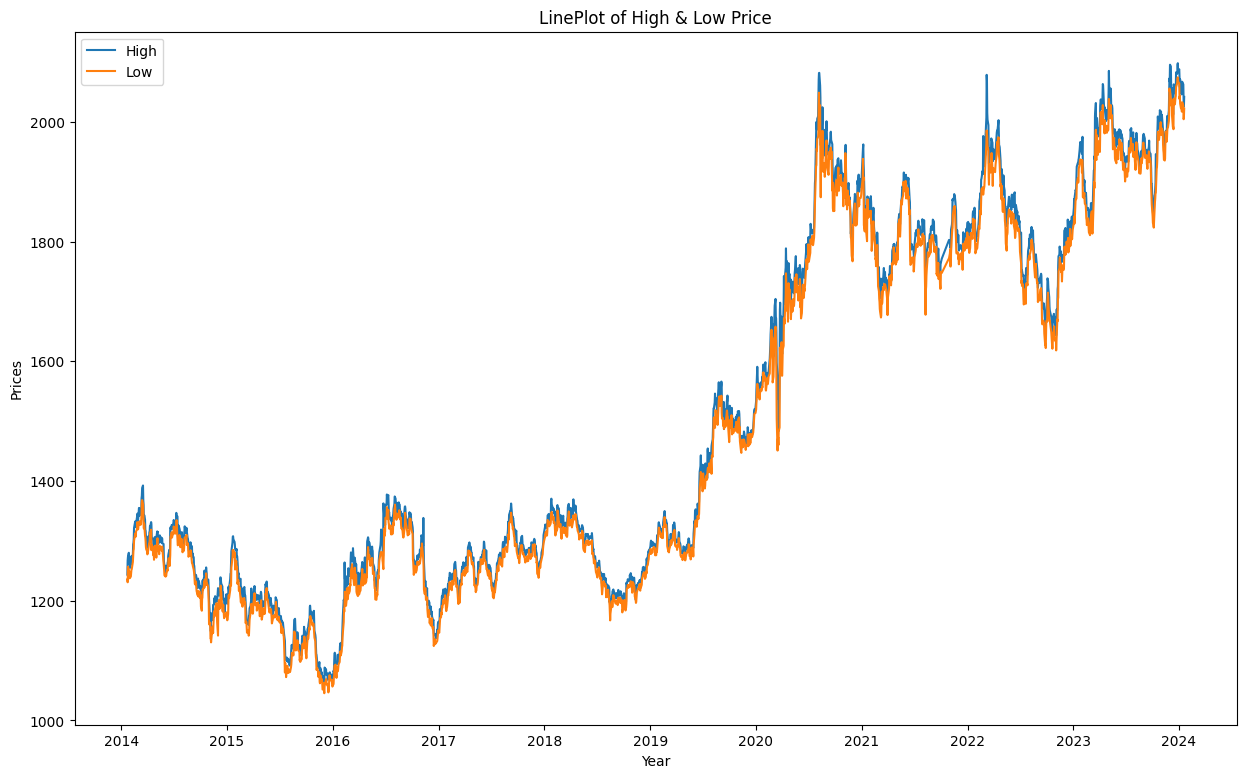

In [9]:
plt.figure(figsize=(15,9))
sns.lineplot(data=df, x='Date', y='High', label='High')
sns.lineplot(data=df, x='Date', y='Low', label='Low')
plt.legend()
plt.title('LinePlot of High & Low Price')
plt.ylabel('Prices')
plt.xlabel('Year')
plt.show()

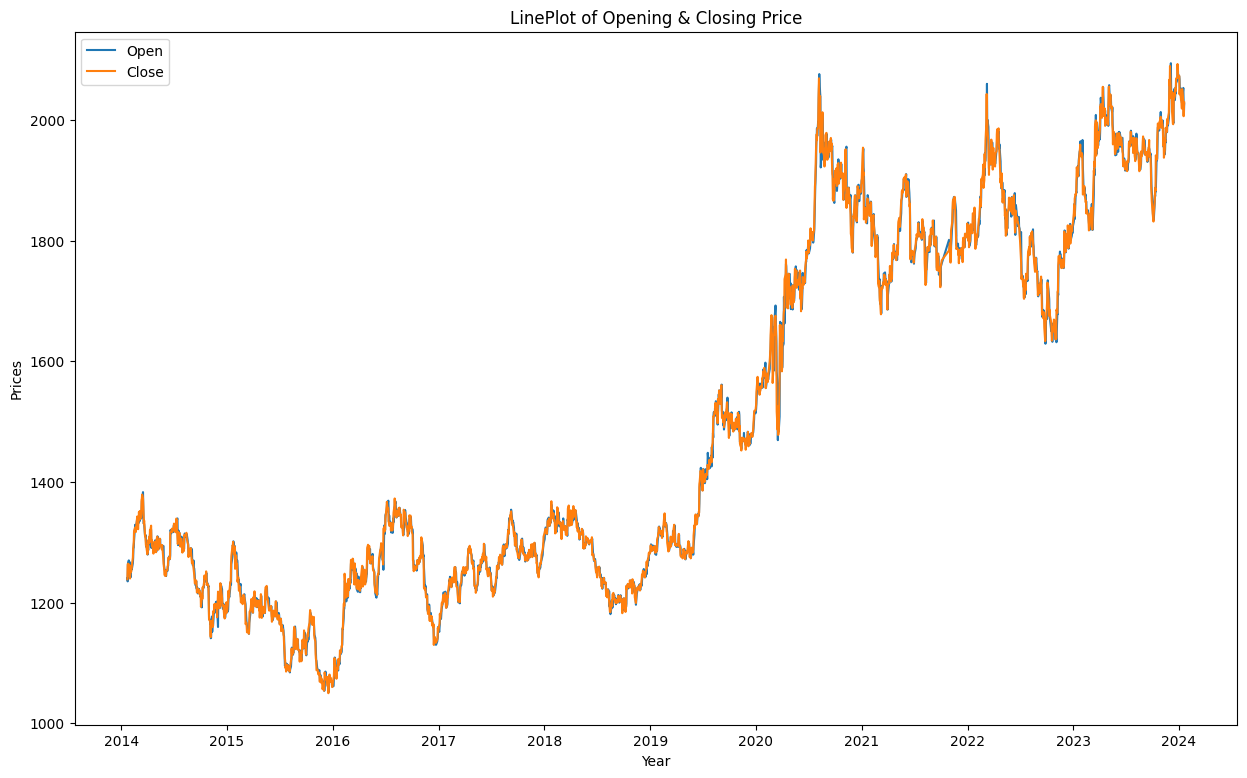

In [10]:
plt.figure(figsize=(15,9))
sns.lineplot(data=df, x='Date', y='Open',label='Open')
sns.lineplot(data=df, x='Date', y='Close', label='Close')
plt.title('LinePlot of Opening & Closing Price')
plt.xlabel('Year')
plt.ylabel('Prices')
plt.show()

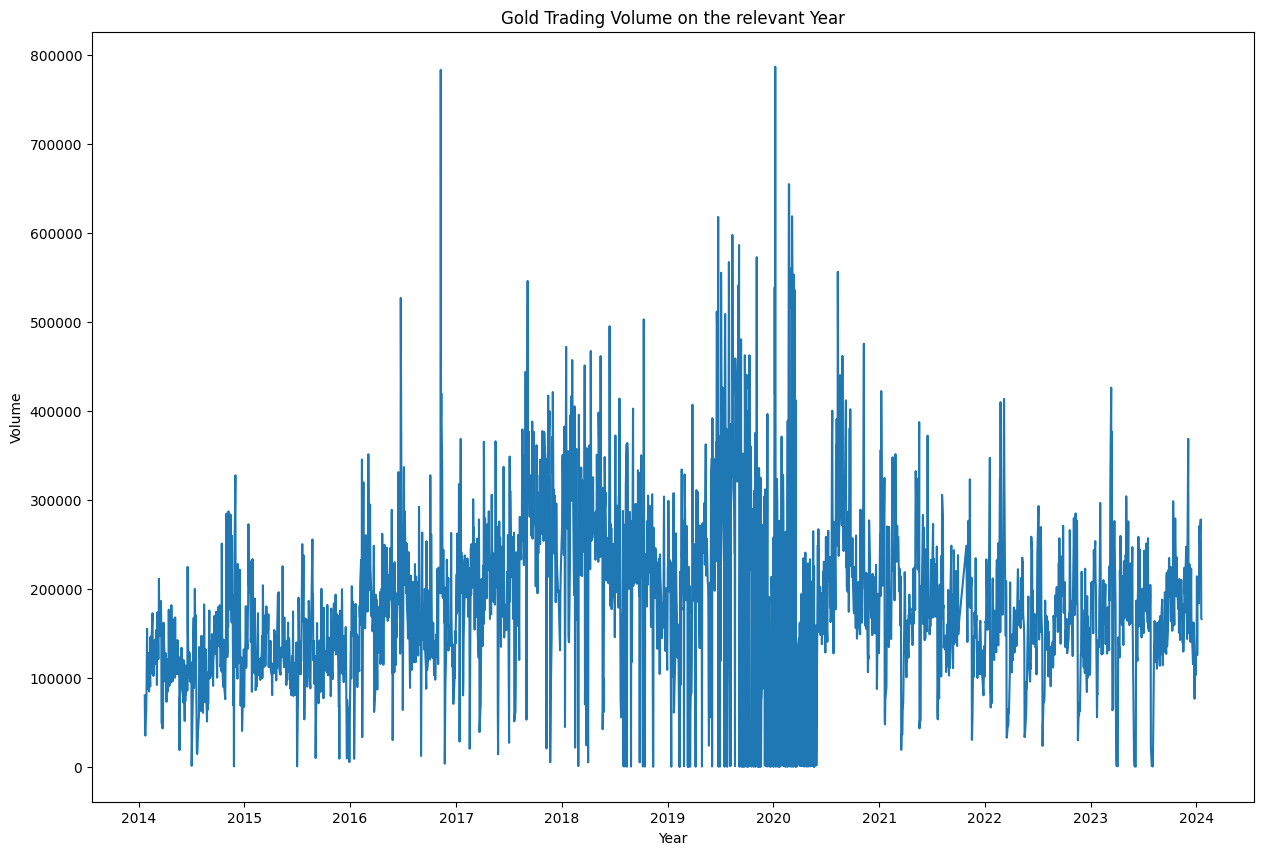

In [11]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df, x='Date', y='Volume')
plt.title('Gold Trading Volume on the relevant Year')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.show()

# Time Series Analysis of Closing Price using FB-Prophet

In [12]:
df_close = df[['Date','Close']]
df_close

,Date,Close
0,2024-01-19,2029.3
1,2024-01-18,2021.6
2,2024-01-17,2006.5
3,2024-01-16,2030.2
4,2024-01-12,2051.6
...,...,...
2506,2014-01-28,1250.5
2507,2014-01-27,1263.5
2508,2014-01-24,1264.5
2509,2014-01-23,1262.5


Rename the Date:ds & Close:y

In [13]:
df_close.rename(columns={'Date':'ds','Close':'y'},inplace=True)
df_close

/tmp/ipykernel_19/2209883113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close.rename(columns={'Date':'ds','Close':'y'},inplace=True)


,ds,y
0,2024-01-19,2029.3
1,2024-01-18,2021.6
2,2024-01-17,2006.5
3,2024-01-16,2030.2
4,2024-01-12,2051.6
...,...,...
2506,2014-01-28,1250.5
2507,2014-01-27,1263.5
2508,2014-01-24,1264.5
2509,2014-01-23,1262.5


In [14]:
from prophet import Prophet

In [15]:
model_close = Prophet()
model_close.fit(df_close)

04:09:25 - cmdstanpy - INFO - Chain [1] start processing
04:09:27 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
future_close = model_close.make_future_dataframe(periods=365)
future_close.tail()

,ds
2853,2025-01-14
2854,2025-01-15
2855,2025-01-16
2856,2025-01-17
2857,2025-01-18


In [17]:
forecast_close = model_close.predict(future_close)
forecast_close[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2853,2025-01-14,2093.466254,1906.171929,2276.831472
2854,2025-01-15,2093.684008,1913.506731,2286.989362
2855,2025-01-16,2095.399024,1907.595721,2281.230833
2856,2025-01-17,2095.642494,1920.497007,2284.689560
2857,2025-01-18,2050.958848,1871.168225,2235.135654


In [18]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model_close, forecast_close)

In [19]:
plot_components_plotly(model_close, forecast_close)

/opt/conda/lib/python3.10/site-packages/plotly/io/_json.py:557: UserWarning:

Discarding nonzero nanoseconds in conversion.



# Time Series Analysis on Gold Volume using FB-Prophet

In [20]:
df_volume = df[['Date','Volume']]
df_volume

,Date,Volume
0,2024-01-19,166078.0
1,2024-01-18,167013.0
2,2024-01-17,245194.0
3,2024-01-16,277995.0
4,2024-01-12,250946.0
...,...,...
2506,2014-01-28,81426.0
2507,2014-01-27,63419.0
2508,2014-01-24,34998.0
2509,2014-01-23,41697.0


Renaming the Date to ds & Volume to y

In [21]:
df_volume.rename(columns={'Date':'ds','Volume':'y'},inplace=True)
df_volume

/tmp/ipykernel_19/1710543927.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
0,2024-01-19,166078.0
1,2024-01-18,167013.0
2,2024-01-17,245194.0
3,2024-01-16,277995.0
4,2024-01-12,250946.0
...,...,...
2506,2014-01-28,81426.0
2507,2014-01-27,63419.0
2508,2014-01-24,34998.0
2509,2014-01-23,41697.0


In [22]:
model_volume = Prophet()
model_volume.fit(df_volume)

04:09:32 - cmdstanpy - INFO - Chain [1] start processing
04:09:32 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
future_volume = model_volume.make_future_dataframe(periods=365)
future_volume.tail()

,ds
2853,2025-01-14
2854,2025-01-15
2855,2025-01-16
2856,2025-01-17
2857,2025-01-18


In [24]:
forecast_volume = model_volume.predict(future_volume)
forecast_volume[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2853,2025-01-14,177361.901131,67870.161709,290085.513346
2854,2025-01-15,182748.813890,77555.985150,294487.258111
2855,2025-01-16,188027.390839,69214.245989,301353.681014
2856,2025-01-17,168418.952580,62726.195093,286021.863380
2857,2025-01-18,160080.580649,46117.438264,273230.614621


In [25]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model_volume, forecast_volume)

In [26]:
plot_components_plotly(model_volume, forecast_volume)

/opt/conda/lib/python3.10/site-packages/plotly/io/_json.py:557: UserWarning:

Discarding nonzero nanoseconds in conversion.



# Time Series Analysis of Opening Price using FB-Prophet

In [27]:
df_open = df[['Date','Open']]
df_open

,Date,Open
0,2024-01-19,2027.4
1,2024-01-18,2009.1
2,2024-01-17,2031.7
3,2024-01-16,2053.4
4,2024-01-12,2033.2
...,...,...
2506,2014-01-28,1254.9
2507,2014-01-27,1269.9
2508,2014-01-24,1264.3
2509,2014-01-23,1235.1


Renaming the Date columns to ds & Open column to y

In [28]:
df_open.rename(columns={'Date':'ds','Open':'y'},inplace=True)
df_open

/tmp/ipykernel_19/1185244258.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
0,2024-01-19,2027.4
1,2024-01-18,2009.1
2,2024-01-17,2031.7
3,2024-01-16,2053.4
4,2024-01-12,2033.2
...,...,...
2506,2014-01-28,1254.9
2507,2014-01-27,1269.9
2508,2014-01-24,1264.3
2509,2014-01-23,1235.1


In [29]:
model_open = Prophet()
model_open.fit(df_open)

04:09:36 - cmdstanpy - INFO - Chain [1] start processing
04:09:38 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
future_open = model_open.make_future_dataframe(periods=365)
future_open.tail()

,ds
2853,2025-01-14
2854,2025-01-15
2855,2025-01-16
2856,2025-01-17
2857,2025-01-18


In [31]:
forecast_open = model_open.predict(future_open)
forecast_open[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2853,2025-01-14,2089.892985,1896.733948,2285.056441
2854,2025-01-15,2090.450642,1910.237413,2286.682233
2855,2025-01-16,2091.808947,1915.045180,2280.703765
2856,2025-01-17,2092.329658,1907.337052,2283.718429
2857,2025-01-18,2051.987731,1853.610415,2249.176594


In [32]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model_open, forecast_open)

In [33]:
plot_components_plotly(model_open, forecast_open)

/opt/conda/lib/python3.10/site-packages/plotly/io/_json.py:557: UserWarning:

Discarding nonzero nanoseconds in conversion.

